In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example usage of DeepLabCut -analysis

## Extract positions on a video using a trained model

Open anaconda prompt and `activate deeplabcut` and navigate to the DeepLabCut folder:

`cd Documents\apps\DeepLabCut-master\Analysis-tools`

Then you need to set a couple of environment variables:
`set TF_CUDNN_USE_AUTOTUNE=0`
`set CUDA_VISIBLE_DEVICES=0`

Crop the videos using ....

Now we are ready to run the DeepLabCut model on the new video.

Place all the videos you want to analyse in `DeepLabCut-master/videos`. Check the settings in `DeepLabCut-master/myconfig_analysis.py`.

Now run AnalyzeVideos:

`python AnalyzeVideos.py`

The output labels should be saved in the video as csv files and can be uploaded in Python

In [53]:
from DLC_tools import DLCsv
import numpy as np

In [54]:
local_file = DLCsv('hello.csv', invert_y=False)

In [55]:
local_file.position_preference()

'Lower environment: 100.0% \nUpper environment: 0.0%'

In [56]:
local_file.df

{'nose':                  x           y  likelihood
 coords                                    
 0        70.430375  268.520622    1.000000
 1        79.634946  274.224509    1.000000
 2        86.839390  275.628998    1.000000
 3        95.829772  282.457248    1.000000
 4       100.601439  289.294962    1.000000
 5       107.484939  300.715000    1.000000
 6       113.443850  315.234425    1.000000
 7       112.796370  325.041836    1.000000
 8       113.518991  336.060237    1.000000
 9       119.608248  341.857875    1.000000
 10      125.136376  352.548640    1.000000
 11      127.444152  359.948561    1.000000
 12      132.613251  365.267308    1.000000
 13      140.233751  361.724799    1.000000
 14      147.294683  364.917253    1.000000
 15      150.640132  364.159476    1.000000
 16      153.118958  363.702600    1.000000
 17      158.582824  364.795954    0.999999
 18      160.930484  365.470468    1.000000
 19      170.100245  363.837743    1.000000
 20      173.684041  364

In [57]:
import matplotlib.pylab as plt


plt.show()

In [58]:
x_t = local_file.df['tail']['x.1']
y_t = local_file.df['tail']['y.1']

x_n = local_file.df['nose']['x']
y_n = local_file.df['nose']['y']

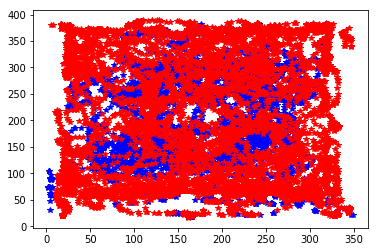

In [59]:
plt.plot(x_t, y_t, 'b*',
        x_n, y_n, 'r*')

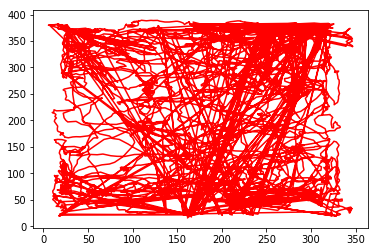

In [60]:
plt.plot(x_n, y_n, 'r')

In [61]:
lhnose = local_file.df['nose'].likelihood

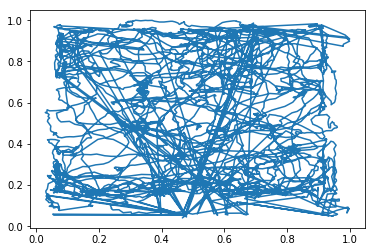

In [62]:
idxs = np.where(lhnose > 0.999)
fil_x_n = x_n[idxs[0]]
fil_y_n = y_n[idxs[0]]
plt.plot(fil_x_n/np.max(fil_x_n), fil_y_n/np.max(fil_y_n))

In [63]:
idxs[0]

array([   0,    1,    2, ..., 9037, 9038, 9039], dtype=int64)